# **Prova modello riconoscimento stile artistico**

Installo pacchetto codice altrui

In [1]:
pip install torch torchvision torchaudio transformers pillow scikit-learn matplotlib requests

  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 MB 1.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 3.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.1/809.1 kB 3.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 3.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 3.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 4.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 3.6 MB/s eta 0:00:00a 0:00:01
Using cached requests-2.32.5-py3-none-any.whl (64 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 3.1 MB/s eta 0:00:00a 0:00

del pacchetto che ho scaricato uso solo alcune funzioni

In [2]:
import requests
import os
import torch
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
from io import BytesIO
import torch.nn as nn
import torchvision.transforms as T
from torchvision.datasets import ImageFolder
from torchvision.models import resnet18
from torch.utils.data import DataLoader, random_split
from transformers import AutoImageProcessor, AutoModelForImageClassification
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Matplotlib is building the font cache; this may take a moment.


carico un immagine da internet usando un link

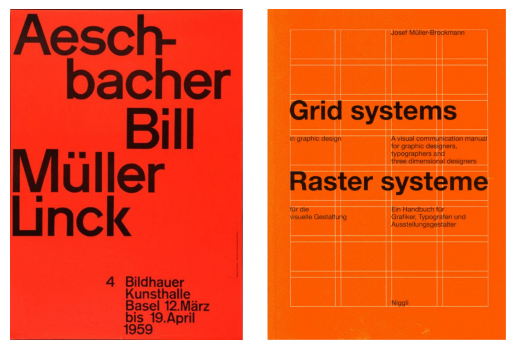

✅ Immagine caricata e salvata come libro.jpg


In [3]:
url = "https://prod-aboutswch-hcms-sdweb.imgix.net/dam/it/sd-web/tCPMETn0Ri5n/Poster%201959%20Hofmann_Cover%20Book%201981%20M%C3%BCller-Brockmann.png?auto=format"
response = requests.get(url)
response.raise_for_status()

image = Image.open(BytesIO(response.content)).convert("RGB")
plt.imshow(image)
plt.axis("off")  # nasconde assi
plt.show()

image.save("libro.jpg")
print("✅ Immagine caricata e salvata come libro.jpg")

Utilizzo del modello già esistente \
Opzione "nessuno stile artistico" non presente

In [4]:
model_name = "oschamp/vit-artworkclassifier" #definisco il modello che voglio usare

processor = AutoImageProcessor.from_pretrained(model_name)
model = AutoModelForImageClassification.from_pretrained(model_name)  #avvio il modello

image = Image.open("libro.jpg").convert("RGB")  #chiedo di utilizzare l'immagine

inputs = processor(images=image, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits
    predicted_class_idx = logits.argmax(-1).item()  #parametri del modello

label = model.config.id2label[predicted_class_idx]  #ottengo la risposta del modello, ossia lo stile artistico
print(f"Stile artistico rilevato: {label}")  #stampo la risposta



Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/transformers/models/vit/feature_extraction_vit.py:30: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


Stile artistico rilevato: art_nouveau


# **Prova modello colori**

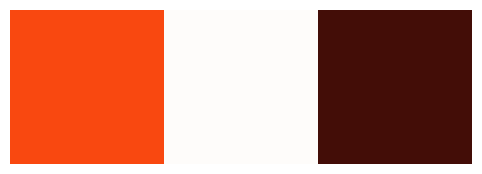

🎨 Colori dominanti rilevati (RGB):
(249, 72, 16)
(254, 252, 250)
(67, 13, 7)


In [5]:
def estrai_colori_principali(image, n_colori=3):
    # Converti immagine in numpy array
    img_np = np.array(image)
    img_np = img_np.reshape((-1, 3))  # Righe = pixel, colonne = RGB

    # Applica K-Means per trovare i colori principali
    kmeans = KMeans(n_clusters=n_colori, random_state=0).fit(img_np)
    colors = kmeans.cluster_centers_.astype(int)

    # Mostra i colori
    plt.figure(figsize=(8, 2))
    plt.imshow([colors / 255])
    plt.axis("off")
    plt.show()

    # Restituisce lista RGB
    return [tuple(map(int, c)) for c in colors]

colori = estrai_colori_principali(image, n_colori=3)

print("🎨 Colori dominanti rilevati (RGB):")
for c in colori:
    print(c)


# **Prova modelli grafici**

In [6]:


model_id = "openai/clip-vit-base-patch32"
model = CLIPModel.from_pretrained(model_id)
processor = CLIPProcessor.from_pretrained(model_id)

# 2 Prompt testuali
style_prompts = {
    "pop art": "bright colorful pop art poster inspired by Roy Lichtenstein and Andy Warhol, bold outlines, comic book style, halftone dots, strong contrast, expressive typography",
    "swiss style": "minimalist Swiss graphic design poster, International Typographic Style, clean grid layout, sans serif typography, asymmetrical composition, red and white colors, Helvetica font",
    "grunge": "grunge poster design, distressed textures, rough brush strokes, layered collage look, dark muted colors, messy typography, underground punk aesthetic",
    "minimal": "ultra minimal poster design, lots of white space, simple shapes, limited color palette, clean typography, modern and elegant composition",
    "japanese": "Japanese graphic design poster, inspired by traditional and contemporary Japanese aesthetics, kanji characters, minimalist composition, red circle motif, delicate balance of space and form",
    "comic book": "comic book cover illustration, dynamic action poses, halftone textures, thick black outlines, bold primary colors, hand-drawn lettering"
}



# 4 Pre-elabora
inputs = processor(text=list(style_prompts.values()), images=image, return_tensors="pt", padding=True)

# 5 Calcola similarità
with torch.no_grad():
    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image
    probs = logits_per_image.softmax(dim=1)

# 6 Risultati
for style, p in zip(style_prompts.keys(), probs[0]):
    print(f"{style:15s}: {p.item():.3f}")



Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


pop art        : 0.000
swiss style    : 0.957
grunge         : 0.000
minimal        : 0.018
japanese       : 0.025
comic book     : 0.000


# **Prova modello categorie tipografiche**

In [7]:

# 2 Carica il modello CLIP
model_id = "openai/clip-vit-base-patch32"
model = CLIPModel.from_pretrained(model_id)
processor = CLIPProcessor.from_pretrained(model_id)

# 3 Prompt testuali per categorie tipografiche
style_prompts = {
    "serif": (
        "poster or text design using serif typography, elegant and classic font style, "
        "letters with small decorative strokes, traditional book aesthetic, "
        "formal and historical appearance"
    ),
    "sans serif": (
        "poster or text design using sans serif typography, clean and modern font style, "
        "no decorative strokes, geometric and minimalistic look, "
        "corporate and contemporary aesthetic"
    ),
    "script": (
        "poster or text design using script typography, handwritten or cursive style, "
        "flowing letters, elegant calligraphy or casual handwriting, "
        "artistic and decorative appearance"
    )
}

# 5 Prepara l’input per CLIP
inputs = processor(text=list(style_prompts.values()), images=image, return_tensors="pt", padding=True)

# 6 Esegui inferenza
with torch.no_grad():
    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image
    probs = logits_per_image.softmax(dim=1)

# 7 Mostra risultati
print("🔎 Analisi dello stile tipografico:")
for style, p in zip(style_prompts.keys(), probs[0]):
    print(f"{style:12s}: {p.item():.3f}")

predicted = list(style_prompts.keys())[probs.argmax().item()]
print(f"\n✅ Stile predominante: {predicted.upper()}")



🔎 Analisi dello stile tipografico:
serif       : 0.113
sans serif  : 0.841
script      : 0.046

✅ Stile predominante: SANS SERIF


# **Prova modello completo**

In [8]:

model_id = "openai/clip-vit-base-patch32"
model = CLIPModel.from_pretrained(model_id)
processor = CLIPProcessor.from_pretrained(model_id)

# --- Stili grafici ---
graphic_prompts = {
    "pop art": "bright colorful pop art poster inspired by Roy Lichtenstein and Andy Warhol, comic-style halftone dots, bold outlines, vibrant colors",
    "swiss style": "minimalist Swiss graphic design poster, International Typographic Style, grid layout, clean sans serif typography, red and white palette",
    "grunge": "grunge poster design, distressed textures, layered collage, dark tones, rough brush strokes, underground punk style",
    "minimal": "ultra minimal poster, large white space, few geometric shapes, simple typography, clean and modern composition",
    "japanese": "Japanese graphic design poster, kanji characters, red circle motif, minimalist composition, balance of space and form",
    "comic book": "comic book cover illustration, bold outlines, halftone textures, primary colors, expressive dynamic lettering"
}

# --- Movimenti artistici ---
art_prompts = {
    "art_nouveau": "elegant art nouveau style, decorative floral lines, organic curves, detailed patterns, flowing forms",
    "baroque": "baroque painting, dramatic lighting, rich textures, golden tones, ornate and grand composition",
    "expressionism": "expressionist style, distorted forms, intense colors, emotional and raw brushwork",
    "impressionism": "impressionist painting, soft edges, bright light, visible brushstrokes, natural scenery",
    "post_impressionism": "post-impressionist style, vivid colors, bold outlines, symbolic imagery beyond realism",
    "realism": "realist painting, detailed lifelike representation, focus on ordinary subjects, natural light",
    "renaissance": "renaissance painting, perspective, harmony, humanistic proportions, balance and clarity",
    "romanticism": "romantic style, emotional intensity, nature scenes, dramatic compositions",
    "surrealism": "surrealist painting, dreamlike scenes, symbolic imagery, unusual juxtapositions",
    "no_artistic_style": "modern non-artistic image, digital or functional graphic design without painterly or historical art influences"
}

# --- Famiglie di font ---
font_prompts = {
    "serif": "serif typography, classic and elegant fonts with decorative strokes, traditional and formal look",
    "sans serif": "sans serif typography, clean and geometric, no decorative strokes, modern appearance",
    "script": "script typography, flowing handwritten or calligraphic letters, artistic and decorative style"
}

# --- Tavolozza dei colori (dominanti) ---
color_prompts = {
    "bright": "image with bright and saturated colors, vivid red, yellow, blue tones",
    "dark": "image with dark muted tones, deep blacks, browns, and grays",
    "pastel": "soft pastel palette, light pink, beige, sky blue, mint green",
    "monochrome": "monochrome palette, single hue in different tones, minimal color variation",
    "neutral": "neutral palette with beige, gray, white, black tones",
}


def classify_category(category_name, prompts):
    inputs = processor(text=list(prompts.values()), images=image, return_tensors="pt", padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits_per_image
        probs = logits.softmax(dim=1)

    best_idx = probs.argmax().item()
    best_label = list(prompts.keys())[best_idx]
    best_score = probs[0, best_idx].item()

    print(f"\n🎯 {category_name.upper()}")
    for label, p in zip(prompts.keys(), probs[0]):
        print(f"{label:18s}: {p.item():.3f}")
    print(f"✅ Predicted: {best_label.upper()} ({best_score:.2f})")
    return best_label, best_score

results = {}

results["graphic_style"], _ = classify_category("Graphic Style", graphic_prompts)
results["artistic_movement"], _ = classify_category("Artistic Movement", art_prompts)
results["font_family"], _ = classify_category("Font Family", font_prompts)
results["color_palette"], _ = classify_category("Color Palette", color_prompts)

print("\n==============================")
print("🎨 FINAL MULTI-LAYER CLASSIFICATION")
print("==============================")
for k, v in results.items():
    print(f"{k:20s}: {v}")



🎯 GRAPHIC STYLE
pop art           : 0.000
swiss style       : 0.868
grunge            : 0.000
minimal           : 0.017
japanese          : 0.115
comic book        : 0.000
✅ Predicted: SWISS STYLE (0.87)

🎯 ARTISTIC MOVEMENT
art_nouveau       : 0.000
baroque           : 0.000
expressionism     : 0.000
impressionism     : 0.000
post_impressionism: 0.001
realism           : 0.000
renaissance       : 0.002
romanticism       : 0.003
surrealism        : 0.000
no_artistic_style : 0.994
✅ Predicted: NO_ARTISTIC_STYLE (0.99)

🎯 FONT FAMILY
serif             : 0.024
sans serif        : 0.970
script            : 0.006
✅ Predicted: SANS SERIF (0.97)

🎯 COLOR PALETTE
bright            : 0.247
dark              : 0.470
pastel            : 0.000
monochrome        : 0.281
neutral           : 0.002
✅ Predicted: DARK (0.47)

🎨 FINAL MULTI-LAYER CLASSIFICATION
graphic_style       : swiss style
artistic_movement   : no_artistic_style
font_family         : sans serif
color_palette       : dark
